In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [17]:
# read dataset
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\melb_data.csv")


In [19]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [21]:

dataset.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [23]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [25]:

dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019,2.5,Yarra,2,1,1.0,202,NaN,1480000
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019,2.5,Yarra,2,1,0.0,156,79.0,1035000
2,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019,2.5,Yarra,3,2,0.0,134,150.0,1465000
3,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019,2.5,Yarra,3,2,1.0,94,NaN,850000
4,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019,2.5,Yarra,3,1,2.0,120,142.0,1600000


In [27]:
dataset.shape

(13580, 15)

In [29]:

dataset.isna().sum()


Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          0
Propertycount       0
Distance            0
CouncilArea      1369
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
Price               0
dtype: int64

In [31]:

# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = [ 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)


In [33]:

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())



In [35]:

dataset.shape

(13580, 15)

In [37]:

dataset = pd.get_dummies(dataset, drop_first=True)

In [39]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,4019,2.5,2,1,1.0,202,151.96765,1480000,False,...,False,False,False,False,False,False,False,False,True,False
1,2,4019,2.5,2,1,0.0,156,79.00000,1035000,False,...,False,False,False,False,False,False,False,False,True,False
2,3,4019,2.5,3,2,0.0,134,150.00000,1465000,False,...,False,False,False,False,False,False,False,False,True,False
3,3,4019,2.5,3,2,1.0,94,151.96765,850000,False,...,False,False,False,False,False,False,False,False,True,False
4,4,4019,2.5,3,1,2.0,120,142.00000,1600000,False,...,False,False,False,False,False,False,False,False,True,False



Let's bifurcate our dataset into train and test dataset

In [42]:

X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [46]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [51]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [58]:
reg.score(test_X, test_y)

-502588475824.61914

In [60]:

reg.score(train_X, train_y)

0.7205390283800279


Here training score is 72% but test score is-502588475824.61914which is very low

Normal Regression is clearly overfitting the data, let's try other models

Using Lasso (L1 Regularized) Regression Model

In [64]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [66]:

lasso_reg.score(test_X, test_y)

0.06972201091063468

In [68]:
lasso_reg.score(train_X, train_y)

0.7156713225803406


Using Ridge (L2 Regularized) Regression Model

In [71]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [73]:

ridge_reg.score(test_X, test_y)

-0.07329033123967887

In [75]:

ridge_reg.score(train_X, train_y)

0.6872968267151651

In [77]:
train_score = ridge_reg.score(train_X, train_y)
test_score = ridge_reg.score(test_X, test_y)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Training Score: 0.6873
Test Score: -0.0733


In [79]:
for a in [0.1, 1, 5, 10, 25, 50]:
    model = Ridge(alpha=a)
    model.fit(train_X, train_y)
    print(f"Alpha: {a}, Train Score: {model.score(train_X, train_y):.4f}, Test Score: {model.score(test_X, test_y):.4f}")

Alpha: 0.1, Train Score: 0.7205, Test Score: 0.0667
Alpha: 1, Train Score: 0.7191, Test Score: 0.0666
Alpha: 5, Train Score: 0.7135, Test Score: 0.0472
Alpha: 10, Train Score: 0.7086, Test Score: 0.0269
Alpha: 25, Train Score: 0.6984, Test Score: -0.0188
Alpha: 50, Train Score: 0.6873, Test Score: -0.0733


In [81]:
from sklearn.linear_model import Ridge

# Train the final model with best alpha
final_model = Ridge(alpha=0.1)
final_model.fit(train_X, train_y)

# Evaluate performance
train_score = final_model.score(train_X, train_y)
test_score = final_model.score(test_X, test_y)

print(f"Final Model - Alpha: 0.1")
print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Final Model - Alpha: 0.1
Training Score: 0.7205
Test Score: 0.0667


In [85]:
# Generate predictions from the final model
preds = final_model.predict(test_X)

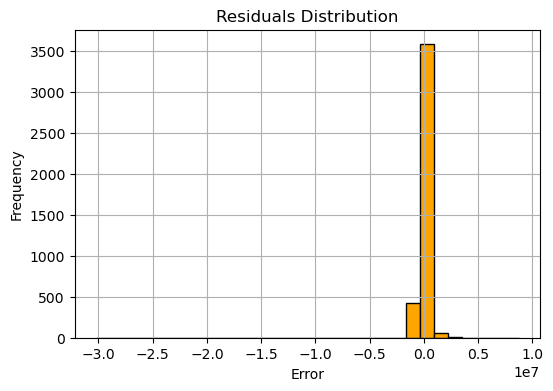

In [87]:
residuals = test_y - preds

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too